In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder


table = pd.read_csv('remote_work.csv') # https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health
grid = pd.DataFrame(table).fillna('None')
grid = grid[['Gender', 'Age', 'Job_Role', 'Industry', 'Region', 'Years_of_Experience', 'Work_Location', 'Number_of_Virtual_Meetings', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Stress_Level', 'Access_to_Mental_Health_Resources', 'Sleep_Quality', 'Physical_Activity', 'Mental_Health_Condition', 'Company_Support_for_Remote_Work']]
unmapped = grid.copy()
print(grid.info())
unmapped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Job_Role                           5000 non-null   object
 3   Industry                           5000 non-null   object
 4   Region                             5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Number_of_Virtual_Meetings         5000 non-null   int64 
 8   Hours_Worked_Per_Week              5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Productivity_Change                5000 non-null   object
 11  Social_Isolation_Rating            5000 non-null   int64 
 12  Satisf

,Gender,Age,Job_Role,Industry,Region,Years_of_Experience,Work_Location,Number_of_Virtual_Meetings,Hours_Worked_Per_Week,Work_Life_Balance_Rating,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Stress_Level,Access_to_Mental_Health_Resources,Sleep_Quality,Physical_Activity,Mental_Health_Condition,Company_Support_for_Remote_Work
0,Non-binary,32,HR,Healthcare,Europe,13,Hybrid,7,47,2,Decrease,1,Unsatisfied,Medium,No,Good,Weekly,Depression,1
1,Female,40,Data Scientist,IT,Asia,3,Remote,4,52,1,Increase,3,Satisfied,Medium,No,Good,Weekly,Anxiety,2
2,Non-binary,59,Software Engineer,Education,North America,22,Hybrid,11,46,5,No Change,4,Unsatisfied,Medium,No,Poor,None,Anxiety,5
3,Male,27,Software Engineer,Finance,Europe,20,Onsite,8,32,4,Increase,3,Unsatisfied,High,Yes,Poor,None,Depression,3
4,Male,49,Sales,Consulting,North America,32,Onsite,12,35,2,Decrease,3,Unsatisfied,High,Yes,Average,Weekly,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,32,Sales,Consulting,Asia,4,Onsite,2,24,5,Decrease,4,Neutral,High,Yes,Average,Weekly,Burnout,1
4996,Female,39,Sales,Healthcare,Africa,27,Onsite,15,48,1,Decrease,1,Satisfied,Low,Yes,Average,None,Depression,1
4997,Female,42,Sales,Healthcare,Oceania,21,Hybrid,1,34,4,Increase,3,Satisfied,High,No,Poor,Daily,Burnout,1
4998,Female,27,Sales,Healthcare,Asia,26,Remote,0,58,5,Increase,3,Unsatisfied,Low,Yes,Average,Daily,None,4


In [57]:
stress = ['Low', 'Medium', 'High']
productivity_change = ['Decrease', 'No Change', 'Increase']
satisfaction = ['Unsatisfied', 'Neutral', 'Satisfied']
physical_activity = ['None', 'Weekly', 'Daily']
sleep_quality = ['Poor', 'Average', 'Good']

ordinal_encoder = OrdinalEncoder(categories=[
    stress, productivity_change, satisfaction,
    physical_activity, sleep_quality])
ordinal_features = ['Stress_Level', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality']
grid[ordinal_features] = ordinal_encoder.fit_transform(grid[ordinal_features])

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_features = ['Region', 'Gender', 'Industry', 'Job_Role', 'Work_Location', 'Mental_Health_Condition']
onehot_encoded = onehot_encoder.fit_transform(grid[onehot_features])
column_names = onehot_encoder.get_feature_names_out(onehot_features)
df = pd.DataFrame(onehot_encoded, columns=column_names)

grid = pd.concat([grid.drop(onehot_features, axis=1), df], axis=1)

grid['Access_to_Mental_Health_Resources'] = grid['Access_to_Mental_Health_Resources'].map({'Yes': 1, 'No': 0})
print(grid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 5000 non-null   int64  
 1   Years_of_Experience                 5000 non-null   int64  
 2   Number_of_Virtual_Meetings          5000 non-null   int64  
 3   Hours_Worked_Per_Week               5000 non-null   int64  
 4   Work_Life_Balance_Rating            5000 non-null   int64  
 5   Productivity_Change                 5000 non-null   float64
 6   Social_Isolation_Rating             5000 non-null   int64  
 7   Satisfaction_with_Remote_Work       5000 non-null   float64
 8   Stress_Level                        5000 non-null   float64
 9   Access_to_Mental_Health_Resources   5000 non-null   int64  
 10  Sleep_Quality                       5000 non-null   float64
 11  Physical_Activity                   5000 no

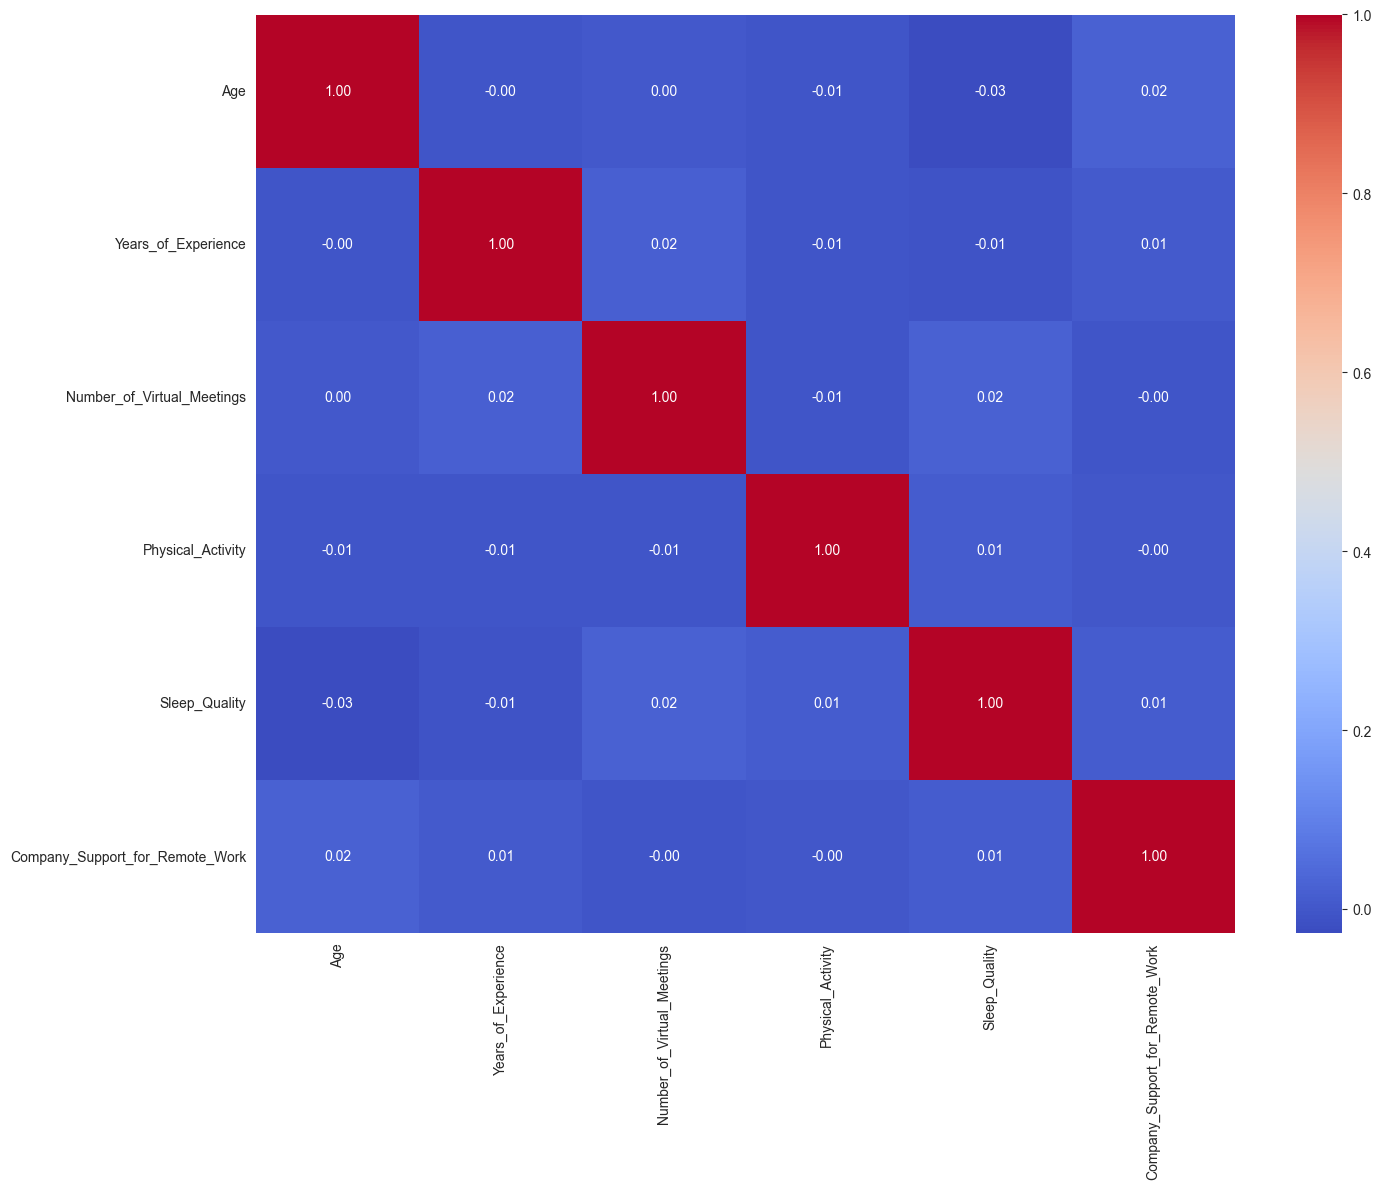

In [60]:
correlation = grid[['Age', 'Years_of_Experience', 'Number_of_Virtual_Meetings', 'Physical_Activity', 'Sleep_Quality', 'Company_Support_for_Remote_Work']].corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

Побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної

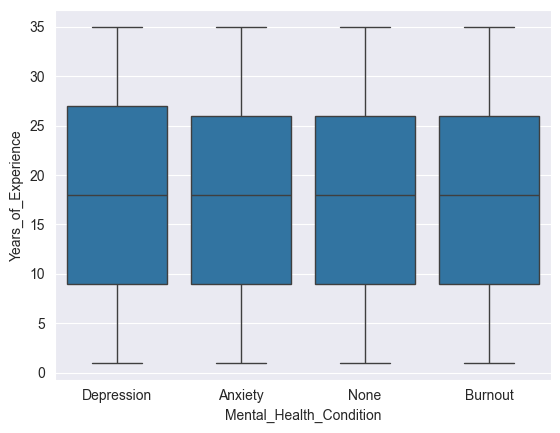

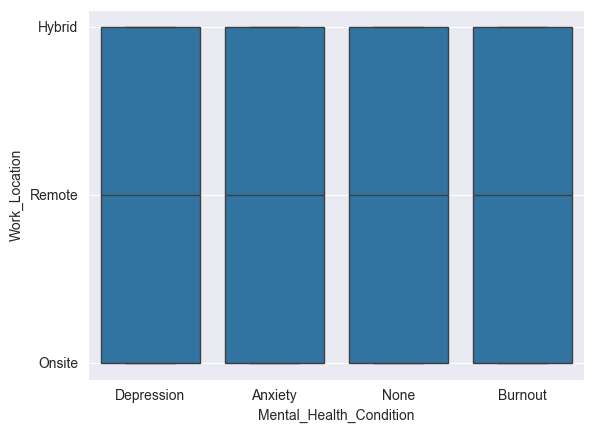

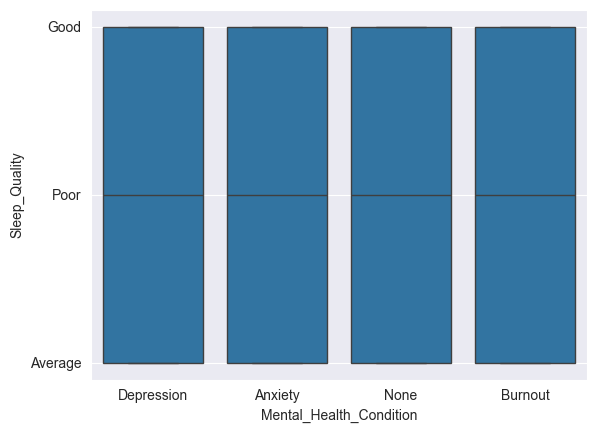

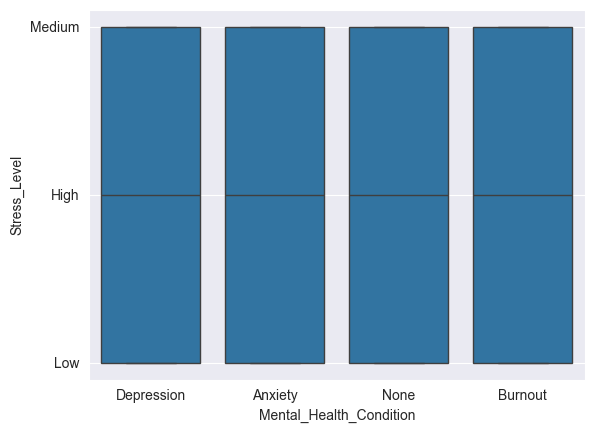

In [39]:
for i in ['Years_of_Experience', 'Work_Location', 'Sleep_Quality', 'Stress_Level']:
    figure = plt.figure()
    sns.boxplot(x='Mental_Health_Condition', y=i, data=unmapped)

In [40]:
# normalization
grid =
X = grid.drop('Mental_Health_Condition', axis=1)
y = grid['Mental_Health_Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

ValueError: could not convert string to float: 'EMP2914'